In [1]:
# import libraries
import time
import random as r
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# settings
sns.reset_orig
sns.set_style('darkgrid')
sns.set_palette('Set1')

np.set_printoptions(linewidth=200)

In [3]:
# initialize the random state using a seed
epoch = int(time.time())
r.seed(epoch)

print(f'Seeded at {epoch}.')

Seeded at 1653239709.


In [4]:
# create random coordinate function (-100 < X < 100)
rcoord = lambda: r.random() * 100 * (-1 if r.randrange(2) else 1)

In [5]:
# create set of customers
i_data = pd.DataFrame()
len_ = 100

i_data['X'] = [rcoord() for _ in range(len_)]
i_data['Y'] = [rcoord() for _ in range(len_)]
i_data['Demand'] = [r.random() + r.randrange(50, 100) for _ in range(len_)]

i_data.head(10)

,X,Y,Demand
0,-60.617062,18.725299,79.772811
1,61.175222,-79.457642,79.474204
2,-88.450467,31.838181,93.421560
3,-48.954354,-38.637760,78.139174
4,-18.119554,-54.315618,95.022300
5,-61.056377,-24.162762,74.466381
6,-32.149042,20.048644,63.777453
7,-18.227382,98.985863,72.074908
8,27.265733,18.202369,61.003249
9,-68.730808,36.725504,57.967847


In [6]:
# create set of candidate locations
j_data = pd.DataFrame()
len_ = 20

j_data['X'] = [rcoord() for _ in range(len_)]
j_data['Y'] = [rcoord() for _ in range(len_)]
j_data['Fixed Charge'] = [r.random() + r.randrange(5000, 10000) for _ in range(len_)]

j_data.head(10)

,X,Y,Fixed Charge
0,-61.802667,-90.040429,6355.290599
1,-7.663700,77.471823,7745.566326
2,3.231645,23.308295,7713.803786
3,78.563287,24.285828,5216.426382
4,-76.114013,-17.755394,6147.471892
5,-46.415470,-89.638055,8279.369940
6,81.451580,-63.429405,8385.168539
7,-5.721613,52.667884,5018.019613
8,1.394674,-53.365103,7074.519264
9,-70.460450,-52.106505,8126.522562


Text(0.5, 1.0, 'Customers and Locations')

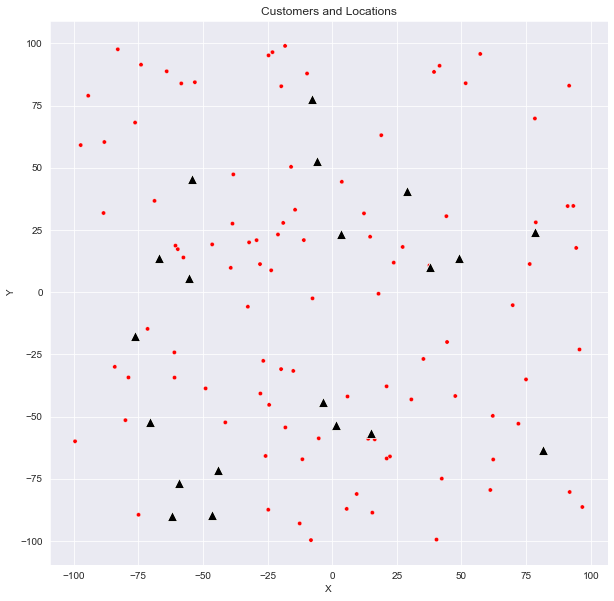

In [7]:
# plot the customers and facilities
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='X', y='Y', data=i_data, size=1, color='red', legend=False)
sns.scatterplot(x='X', y='Y', data=j_data, s=100, color='black', marker='^')
plt.title('Customers and Locations')

In [8]:
# create distance matrix
eucl = lambda x1, x2, y1, y2: ((x1 - x2)**2 + (y1 - y2)**2)**0.5

i_loc = i_data[['X', 'Y']].to_numpy()
j_loc = j_data[['X', 'Y']].to_numpy()

dist_ij = np.array([np.array([eucl(i[0],i[1],j[0],j[1]) for j in j_loc]) for i in i_loc])
dist_ij

array([[ 84.21746523, 116.37554547,  81.84303319, ...,  89.15231008,  80.22352028, 127.55297169],
       [143.43979065, 164.39482862, 142.05869975, ..., 146.39168858, 141.13187202, 172.4881233 ],
       [123.55860981, 147.36830118, 121.95257558, ..., 126.97355237, 120.87167499, 156.34548025],
       ...,
       [ 92.29209086, 122.34588742,  90.13063112, ...,  96.81623303,  88.66262906, 133.02258895],
       [ 52.77203965,  96.10189542,  48.89364785, ...,  60.33606808,  46.13155021, 109.37123619],
       [ 61.0544603 , 100.887726  ,  57.73515181, ...,  67.69933579,  55.41551118, 113.59941135]])

In [9]:
# save new data to files
with pd.ExcelWriter('data.xlsx', mode='w') as writer:
    i_data.to_excel(writer, sheet_name='i_data', index=False)
    j_data.to_excel(writer, sheet_name='j_data', index=False)
    pd.DataFrame(dist_ij).to_excel(writer, sheet_name='dist_ij', index=False)
    
print('Done')

Done
